In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
import itertools
from keras.layers import LSTM
from keras import layers

In [2]:
BTC_01 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-01.csv')
BTC_02 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-02.csv')
BTC_03 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-03.csv')
BTC_04 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-04.csv')
BTC_05 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-05.csv')
BTC_06 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-06.csv')
BTC_07 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-07.csv')
BTC_08 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-08.csv')
BTC_09 = pd.read_csv('BTCUSDC/BTCUSDC-1m-2022-09.csv')

ETH_01 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-01.csv')
ETH_02 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-02.csv')
ETH_03 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-03.csv')
ETH_04 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-04.csv')
ETH_05 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-05.csv')
ETH_06 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-06.csv')
ETH_07 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-07.csv')
ETH_08 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-08.csv')
ETH_09 = pd.read_csv('ETHUSDC/ETHUSDC-1m-2022-09.csv')

In [3]:
BTC_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44639 entries, 0 to 44638
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1640995200000     44639 non-null  int64  
 1   46216.40000000    44639 non-null  float64
 2   46265.18000000    44639 non-null  float64
 3   46216.40000000.1  44639 non-null  float64
 4   46263.39000000    44639 non-null  float64
 5   0.54812000        44639 non-null  float64
 6   1640995259999     44639 non-null  int64  
 7   25341.47911960    44639 non-null  float64
 8   14                44639 non-null  int64  
 9   0.53095000        44639 non-null  float64
 10  24547.94353160    44639 non-null  float64
 11  0                 44639 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 4.1 MB


In [4]:
columns = ['open_time', 'open'	, 'high','low',	'close','volume',	'close_time','quote_volume',
'count'	,'taker_buy_volume','taker_buy_quote_volume',	'ignore']

In [5]:
for df in [BTC_01, BTC_02, BTC_03, BTC_04, BTC_05, BTC_06, BTC_07, BTC_08, BTC_09]:
  df.columns = columns

for df in [ETH_01, ETH_02, ETH_03, ETH_04, ETH_05, ETH_06, ETH_07, ETH_08, ETH_09]:
  df.columns = columns

In [6]:
BTC = pd.concat([BTC_01, BTC_02, BTC_03, BTC_04, BTC_05, BTC_06, BTC_07, BTC_08, BTC_09])
ETH = pd.concat([ETH_01, ETH_02, ETH_03, ETH_04, ETH_05, ETH_06, ETH_07, ETH_08, ETH_09])

In [7]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390411 entries, 0 to 40498
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_time               390411 non-null  int64  
 1   open                    390411 non-null  float64
 2   high                    390411 non-null  float64
 3   low                     390411 non-null  float64
 4   close                   390411 non-null  float64
 5   volume                  390411 non-null  float64
 6   close_time              390411 non-null  int64  
 7   quote_volume            390411 non-null  float64
 8   count                   390411 non-null  int64  
 9   taker_buy_volume        390411 non-null  float64
 10  taker_buy_quote_volume  390411 non-null  float64
 11  ignore                  390411 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 38.7 MB


In [8]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390411 entries, 0 to 40498
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_time               390411 non-null  int64  
 1   open                    390411 non-null  float64
 2   high                    390411 non-null  float64
 3   low                     390411 non-null  float64
 4   close                   390411 non-null  float64
 5   volume                  390411 non-null  float64
 6   close_time              390411 non-null  int64  
 7   quote_volume            390411 non-null  float64
 8   count                   390411 non-null  int64  
 9   taker_buy_volume        390411 non-null  float64
 10  taker_buy_quote_volume  390411 non-null  float64
 11  ignore                  390411 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 38.7 MB


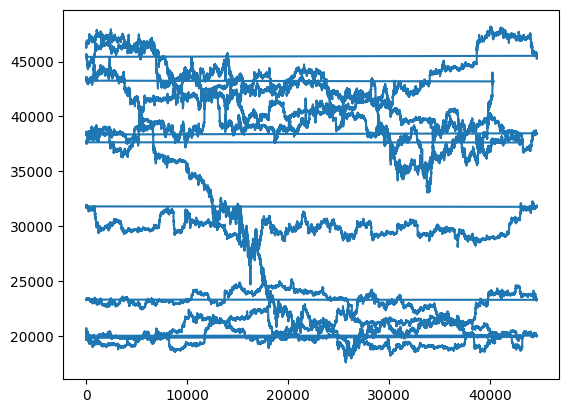

In [10]:
plt.plot(BTC['close'])

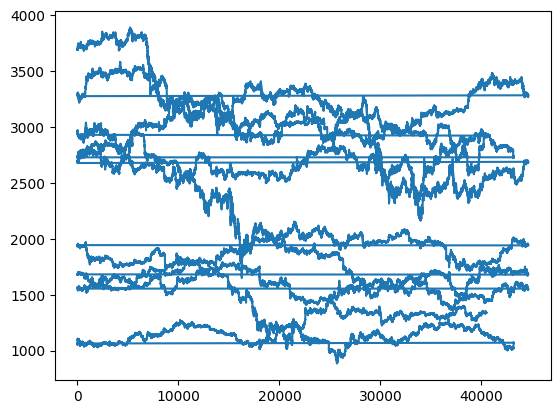

In [11]:
plt.plot(ETH['close'])

In [13]:
close_btc = BTC['close']
close_eth = ETH['close']

In [14]:
close_btc.describe()

count    390411.000000
mean      31724.349680
std        9566.979218
min       17600.000000
25%       21492.210000
50%       30466.420000
75%       40697.525000
max       48196.540000
Name: close, dtype: float64

In [15]:
close_eth.describe()

count    390411.000000
mean       2227.865035
std         766.486924
min         884.340000
25%        1577.010000
50%        2032.890000
75%        2936.830000
max        3888.860000
Name: close, dtype: float64

In [17]:
scaler = StandardScaler()
close_btc = scaler.fit_transform(close_btc.values.reshape(-1, 1))
close_eth = scaler.fit_transform(close_eth.values.reshape(-1, 1))

In [21]:
print(close_btc.max())
print(close_btc.min())


1.721777693917331
-1.4763665152548828


In [22]:
print(close_eth.max())
print(close_eth.min())

2.1670259991480316
-1.7528371502052251


In [50]:
coins = pd.DataFrame({'BTC': close_btc.flatten(), 'ETH': close_eth.flatten()})
coins.head()

,BTC,ETH
0,1.524376,1.909383
1,1.531090,1.910257
2,1.526894,1.910231
3,1.527044,1.907308
4,1.537760,1.920564


In [51]:
len(coins)

390411

In [56]:
n_all_time = len(coins)
print("all : ", n_all_time)
n_test_time = 900

train = coins[:-n_test_time]
test = coins[-n_test_time:]

print(train.shape, test.shape)

all :  390411
(389511, 2) (900, 2)


In [57]:
train_X, train_y = train['BTC'], train['ETH']
test_X, test_y = test['BTC'], test['ETH']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(389511,) (389511,) (900,) (900,)


In [65]:
train_X.shape[0]

389511

In [66]:
train_X = train_X.values.reshape(train_X.shape[0], 1, 1)
test_X = test_X.values.reshape(test_X.shape[0], 1, 1)

In [67]:
train_X.shape, test_X.shape

((389511, 1, 1), (900, 1, 1))

In [68]:
model = Sequential()
model.add(LSTM(90, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
print(type(train_X))

<class 'numpy.ndarray'>


In [71]:
history = model.fit(train_X, train_y, epochs=100, batch_size=32, verbose=1, shuffle=False, validation_data=(test_X, test_y))

Epoch 1/100
12173/12173 [==============================] - 11s 935us/step - loss: 0.0031 - val_loss: 0.0015
Epoch 2/100
12173/12173 [==============================] - 11s 904us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 3/100
12173/12173 [==============================] - 11s 888us/step - loss: 0.0041 - val_loss: 0.0030
Epoch 4/100
12173/12173 [==============================] - 11s 874us/step - loss: 0.0041 - val_loss: 0.0030
Epoch 5/100
12173/12173 [==============================] - 11s 874us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 6/100
12173/12173 [==============================] - 11s 890us/step - loss: 0.0040 - val_loss: 0.0047
Epoch 7/100
12173/12173 [==============================] - 11s 892us/step - loss: 0.0040 - val_loss: 0.0047
Epoch 8/100
12173/12173 [==============================] - 11s 881us/step - loss: 0.0039 - val_loss: 0.0043
Epoch 9/100
12173/12173 [==============================] - 11s 907us/step - loss: 0.0039 - val_loss: 0.0045
Epoch 10/100
12173/12173 [==

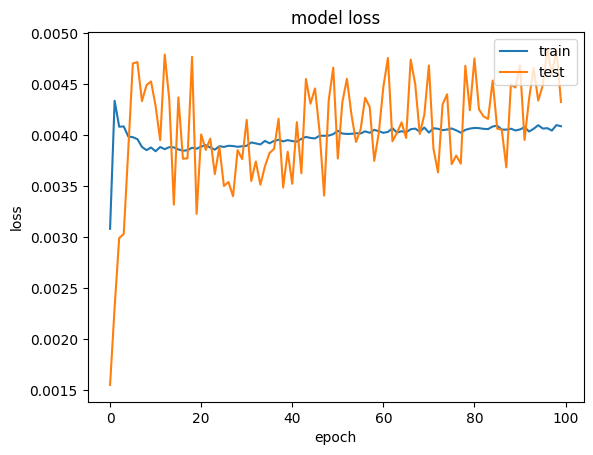

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()